Imports & load data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/raw/Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Dataset overview

In [29]:
df.shape

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Target variable analysis- Important

Target Variable Selection

The modeling target for this project is Churn Value, a binary numeric variable where 1 indicates customer churn and 0 indicates retention. This variable is a direct numeric encoding of Churn Label and is more suitable for machine learning models. Using Churn Value avoids additional label encoding steps while preserving the same information content.

In [30]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [31]:
df['Churn Value'].value_counts(normalize=True)   #converts counts into proportions (i.e., percentages of the total)

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Visualize churn distribution

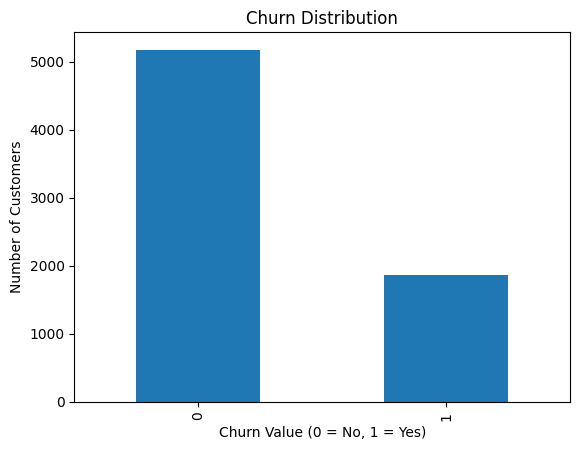

In [32]:
df["Churn Value"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn Value (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

Cross-check consistency

In [33]:
pd.crosstab(df["Churn Label"], df["Churn Value"])


Churn Value,0,1
Churn Label,,
No,5174,0
Yes,0,1869


Numeric Features vs Churn 
How do key numeric features differ between churned and non-churned customers?

In [34]:
numeric_cols = [ "Tenure Months", "Monthly Charges", "Total Charges"]

df[numeric_cols].dtypes

Tenure Months        int64
Monthly Charges    float64
Total Charges       object
dtype: object

Convert Total Charges to numeric (EDA-safe fix)

In [35]:
df["Total Charges"] = pd.to_numeric( df["Total Charges"], errors="coerce")   #coerce: invalid parsing will be set as NaN

In [36]:
df[numeric_cols].dtypes

Tenure Months        int64
Monthly Charges    float64
Total Charges      float64
dtype: object

Compare means by churn status

In [37]:
df.groupby("Churn Value")[numeric_cols].mean()

,Tenure Months,Monthly Charges,Total Charges
Churn Value,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


Based on this:

Use scaling for numeric features

Start with Logistic Regression (baseline)

Add Random Forest to capture nonlinear price effects

Evaluate recall and ROC-AUC, not just accuracy

Consider threshold tuning later

Visualize differences

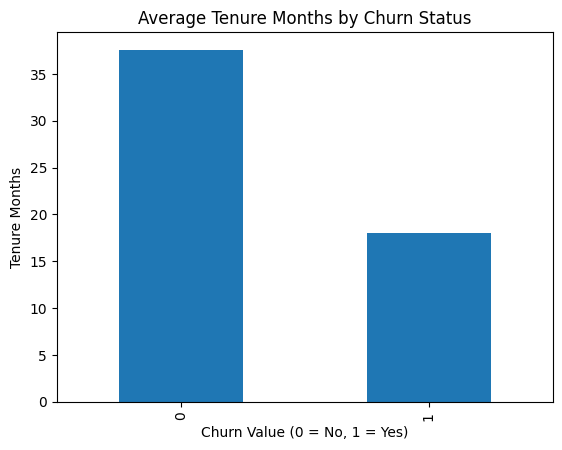

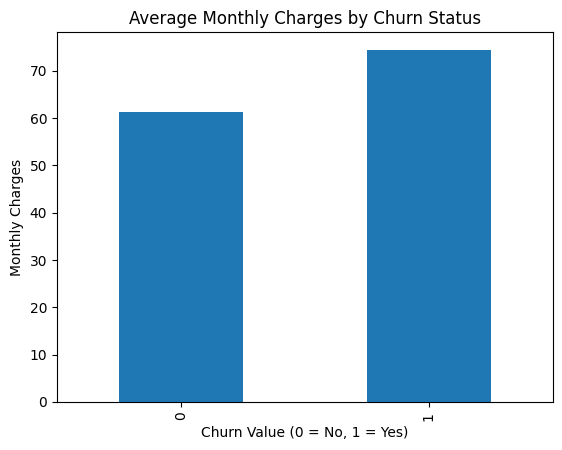

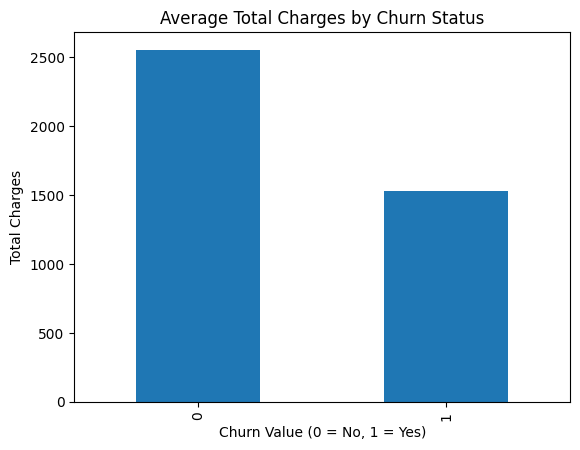

In [38]:
for col in numeric_cols:
    df.groupby("Churn Value")[col].mean().plot(kind="bar")
    plt.title(f"Average {col} by Churn Status")
    plt.xlabel("Churn Value (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


Distribution check

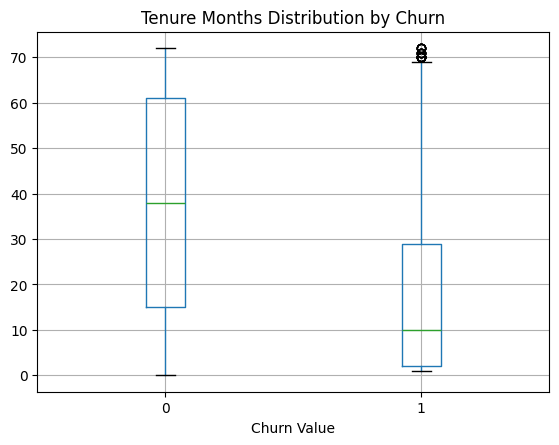

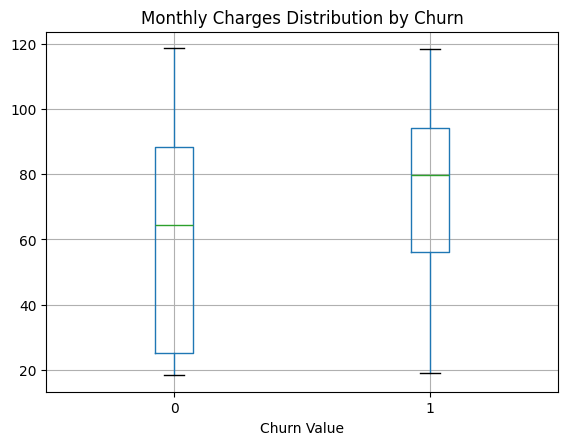

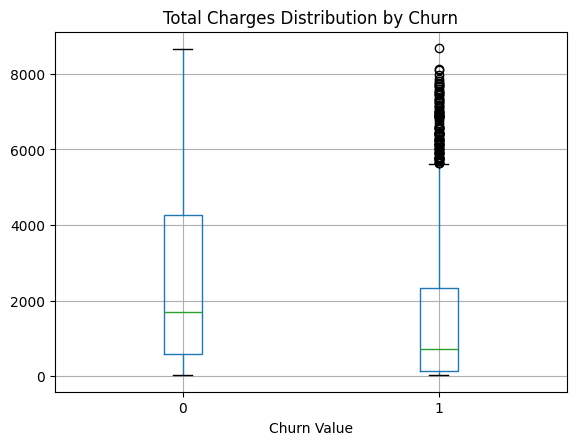

In [39]:
for col in numeric_cols:
    df.boxplot(column=col, by="Churn Value")
    plt.title(f"{col} Distribution by Churn")
    plt.suptitle("")
    plt.xlabel("Churn Value")
    plt.show()


Numeric Feature Insights

Customers who churn tend to have significantly shorter tenure compared to retained customers, indicating that churn is more likely early in the customer lifecycle. Churned customers also exhibit slightly higher monthly charges on average, suggesting potential price sensitivity. Total charges are lower for churned customers, which is consistent with their shorter tenure. These findings suggest tenure and pricing-related variables will be important predictors in the modeling stage.

Categorical Features

In [41]:
churn_by_contract = (
    df.groupby("Contract")["Churn Value"]
      .mean()
      .sort_values(ascending=False)
)

churn_by_contract

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64

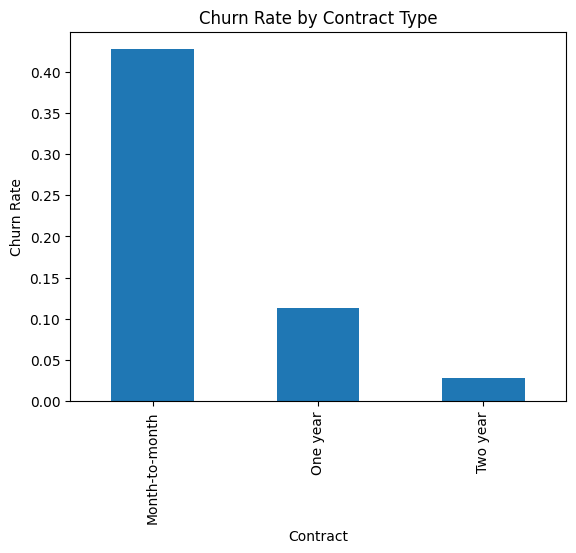

In [42]:
churn_by_contract.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


Repeat for other key features

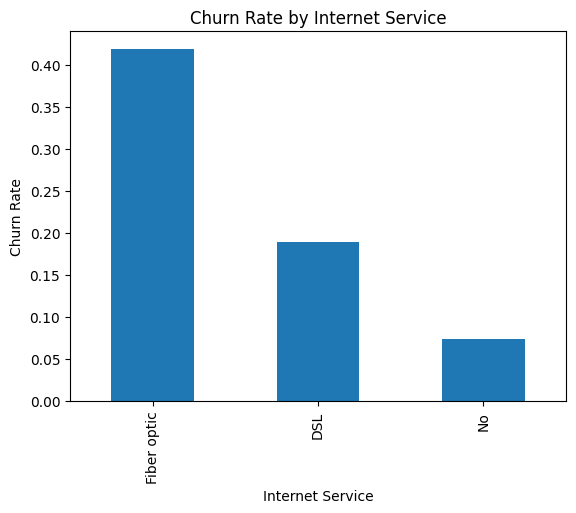

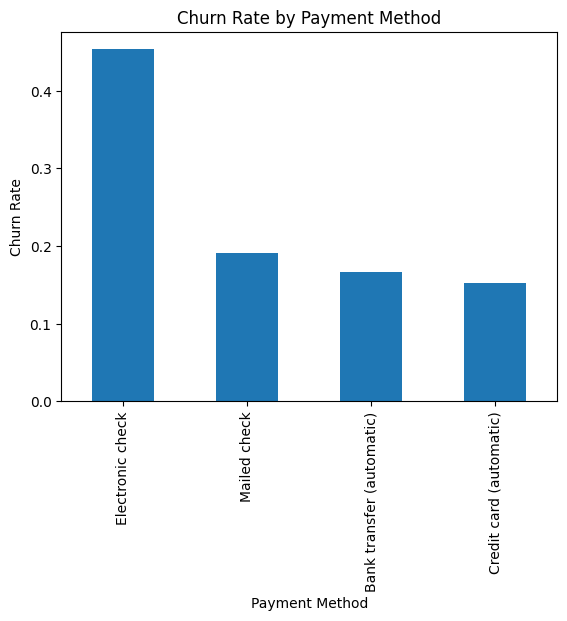

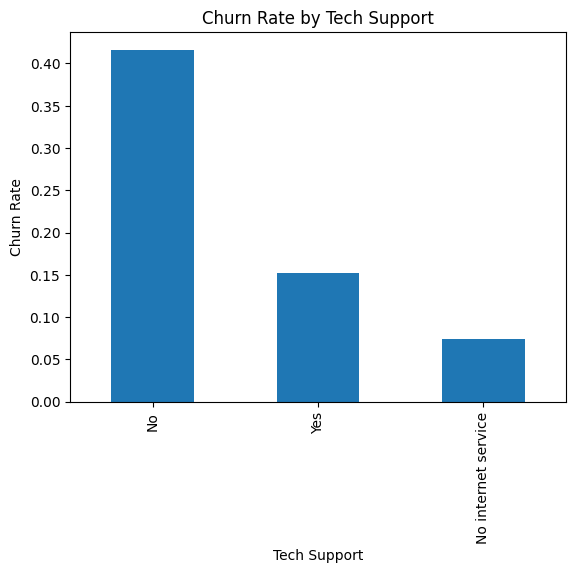

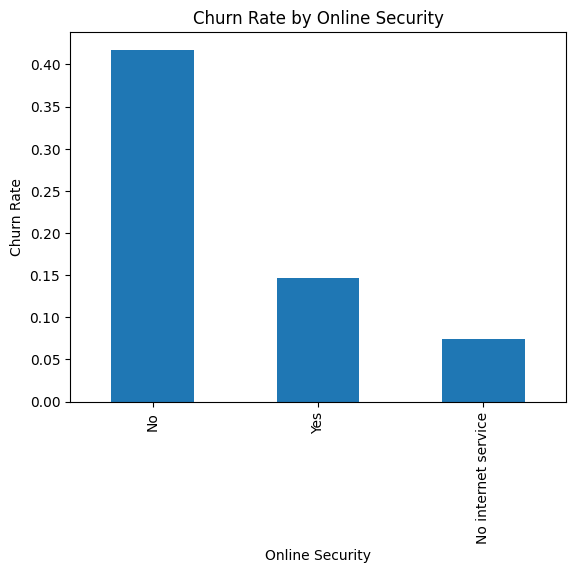

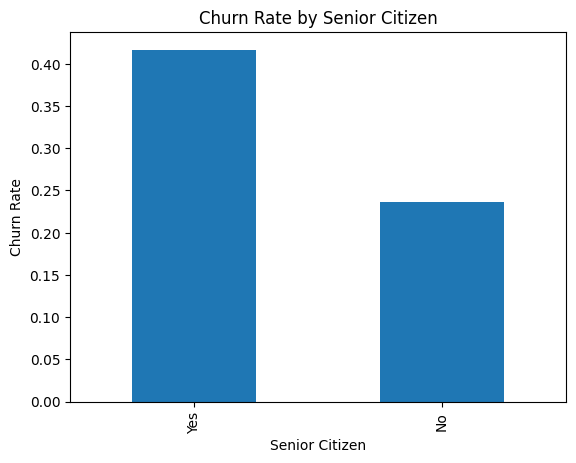

In [43]:
cat_cols = [
    "Internet Service",
    "Payment Method",
    "Tech Support",
    "Online Security",
    "Senior Citizen"
]

for col in cat_cols:
    churn_rate = df.groupby(col)["Churn Value"].mean().sort_values(ascending=False)
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()

Categorical Feature Insights

Contract type exhibits the strongest relationship with churn, with month-to-month customers showing significantly higher churn rates compared to long-term contracts. Customers without services such as technical support or online security are also more likely to churn, suggesting that perceived service quality plays a key role in retention. Payment method further differentiates churn behavior, with manual payment methods associated with higher churn. These findings indicate that service-related and contractual features are critical predictors of churn.
A feature is strong when it satisfies at least one of these:
It creates a large separation between low-churn and high-churn groups
It is stable and consistent across the population
It reflects a causal or decision-related mechanism
It adds unique signal beyond other features